In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard (2).csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
filename = next(iter(uploaded))
fulldataset = pd.read_csv(io.BytesIO(uploaded[filename]))

 This line of code is selecting all rows (:) and the columns with indices 1, 2, 3, 4, 5, the second-to-last, and the last column from the datafull DataFrame, and then assigning this subset to the variable data.

In [ ]:
data = fulldataset.iloc[:, [1, 2, 3, 4, 5, -2, -1]]

# 1. Origin: The 'data' DataFrame is created from the 'fulldataset' DataFrame, which was read from an uploaded CSV file. This file was uploaded using Google Colab's file upload feature and processed using pandas.

# 2. Selection of Columns: 'data' includes specific columns selected from 'fulldataset'. The selection is made using iloc[:, [1, 2, 3, 4, 5, -2, -1]], which means it contains all rows but only the columns with indices 1, 2, 3, 4, 5 (which are the 2nd to 6th columns, as Python indexing starts at 0), and the last two columns of 'fulldataset'.

# 3. Purpose: This selection of columns in 'data' is based on the relevance of these specific features for the subsequent analysis or modeling. This could be due to these columns containing the most relevant variables of interest in the study.

# Note: It's crucial to validate that the selected columns align with the intended analysis and ensure that no critical data is excluded during this selection process.

In [ ]:
data

,V1,V2,V3,V4,V5,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,69.99,0
...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,10.00,0


descriptive statistics

In [ ]:
data.describe()

,V1,V2,V3,V4,V5,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,25691.160000,1.000000


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
Amount,284807.0,8.834962e+01,250.120109,0.000000,5.600000,22.000000,77.165000,25691.160000
Class,284807.0,1.727486e-03,0.041527,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
count = data['Class'].value_counts()[0]
print(count)

284315


In [ ]:
count_1 = data['Class'].value_counts()[1]
print(count_1)

492


In [ ]:
# Features (all columns except 'Class')
X = data.drop('Class', axis=1)

# Target variable (the 'Class' column)
y = data['Class']

In [ ]:
# Splitting the dataset into training and testing sets with stratification on the 'Class' column
train_data, test_data = train_test_split(data, train_size=0.80, stratify=y)

In [ ]:
train_data

,V1,V2,V3,V4,V5,Amount,Class
131110,-1.139097,-0.543772,2.545574,-0.709181,0.331374,79.00,0
83151,0.921169,-0.427775,1.104404,1.160505,-0.336235,32.04,0
161574,-0.348160,0.844646,1.237409,-0.552874,-0.980439,43.85,0
49007,1.254027,-0.792932,0.242420,-0.446319,-0.940256,64.96,0
33661,0.946045,-0.092314,1.301139,2.523432,-0.513844,60.44,0
...,...,...,...,...,...,...,...
38712,1.154826,0.166233,0.593458,0.502893,-0.315514,4.49,0
160165,-0.771943,0.173006,1.452733,-2.612200,0.188770,15.80,0
203330,1.974360,-0.424753,-1.423240,-0.196485,0.057283,50.00,0
39698,-0.523165,-0.100021,0.892966,-1.900405,-0.156870,100.92,0


In [ ]:
train_data['Class'].value_counts()[1]

394

In [ ]:
test_data

,V1,V2,V3,V4,V5,Amount,Class
144321,-0.583776,0.759307,1.608259,-0.111503,0.012134,11.99,0
86471,1.258101,0.366112,0.309680,0.691623,-0.360165,0.89,0
147798,1.895670,-0.218042,-0.422787,1.384778,-0.159870,15.37,0
23233,1.409400,-0.189446,0.053200,-0.540461,-0.792127,15.00,0
145304,-0.301877,0.998818,0.432491,-0.142791,-0.392399,37.12,0
...,...,...,...,...,...,...,...
152017,-0.317096,0.716439,0.703942,-0.723622,0.844719,7.94,0
37604,1.210129,0.189235,0.292612,0.592685,-0.449917,2.99,0
220773,1.371051,-1.089396,-1.957640,0.604473,0.425657,302.90,0
160820,-0.098200,1.191573,-0.217210,-0.457029,0.566886,0.79,0


In [ ]:
X_train = train_data.iloc[:,1:-1]
y_train = train_data.Class
X_test = test_data.iloc[:,1:-1]
y_test = test_data.Class

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [ ]:
# Create a decision tree classifier object
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=5, splitter='best')

In [ ]:
# Create a pipeline
pipeline = Pipeline(steps=[('classifier', dt_classifier)])

In [ ]:
# Perform cross-validation
cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=5)

In [ ]:
# Fit the model on the training data
pipeline.fit(X_train, y_train)

print(f'Cross-validation scores: {cross_val_scores.mean()}')

Cross-validation scores: 0.9987930391274771


In [ ]:
# Use the pipeline to predict the classes on the training data
y_train_pred = pipeline.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred)

print(train_f1)

0.6358024691358025


In [ ]:
# Use the pipeline to predict the classes on the test data
y_test_pred = pipeline.predict(X_test)

# Now you can use f1_score to compare the true labels and the predicted labels
test_f1 = f1_score(y_test, y_test_pred)

print(test_f1)

0.6219512195121951


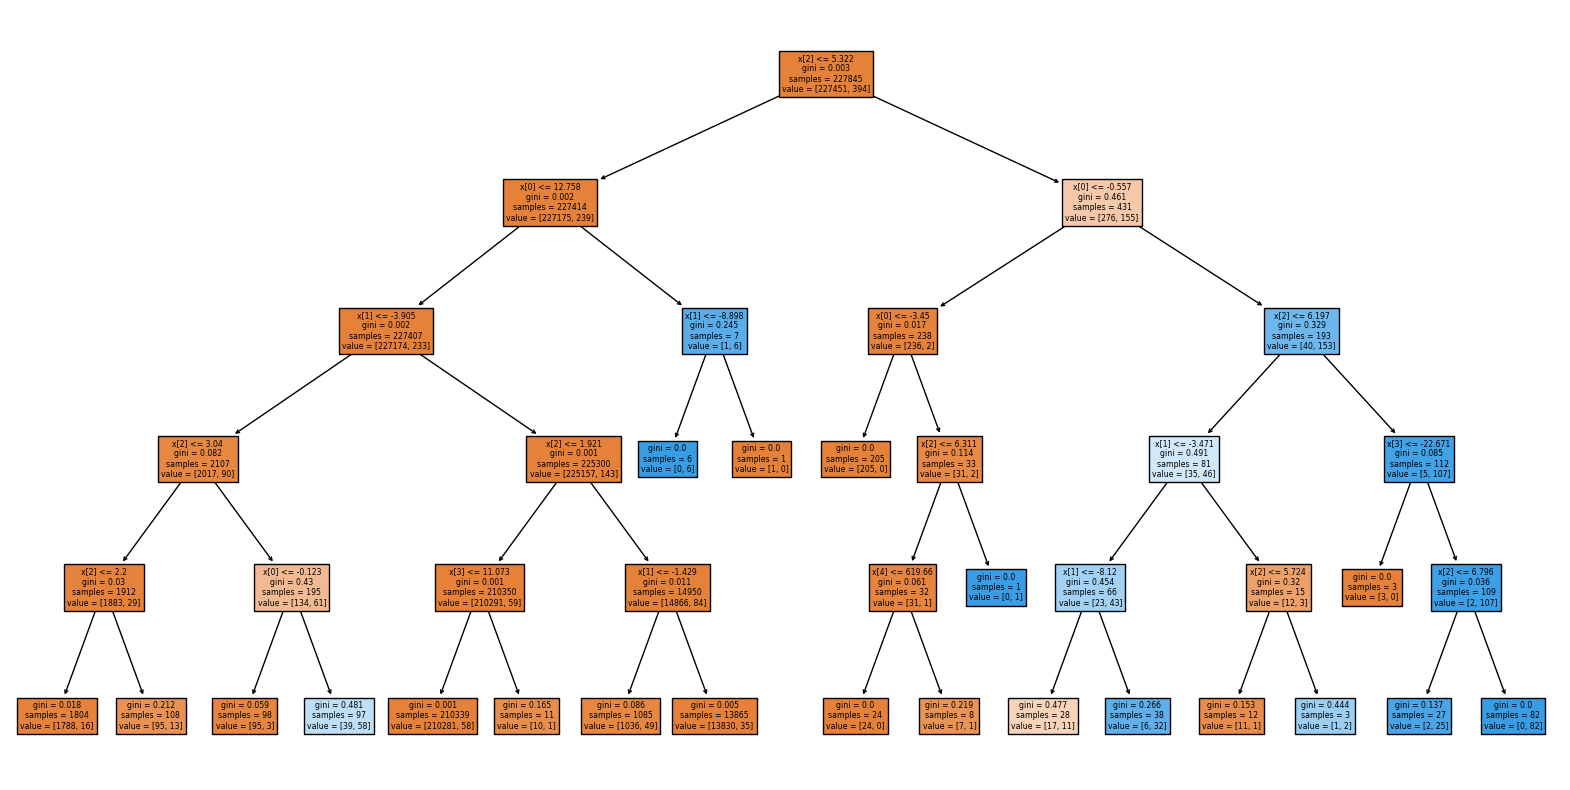

In [ ]:
# After fitting the pipeline
pipeline.fit(X_train, y_train)

# Extract the decision tree model from the pipeline
fitted_tree = pipeline.named_steps['classifier']

# Plot the decision tree
plt.figure(figsize=(20, 10))  # You can adjust the figure size as needed
tree.plot_tree(fitted_tree, filled=True)

plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB
NBclassification = GaussianNB()
NBclassification.fit(X_train, y_train)

GaussianNB()

In [ ]:
f1_score(y_train,NBclassification.predict(X_train))

0.14529914529914528

In [ ]:
f1_score(y_test,NBclassification.predict(X_test))

0.15104166666666669

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFclassifier = RandomForestClassifier(criterion = "gini",max_depth=5, random_state=0)
RFclassifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [ ]:
f1_score(y_train,RFclassifier.predict(X_train))

0.5617173524150268

In [ ]:
f1_score(y_test,RFclassifier.predict(X_test))

0.5072463768115941

In [ ]:
IsolationClassifier = IsolationForest(random_state=0)
# Fit the Isolation Forest on your training data
# Note: Isolation Forest is an unsupervised algorithm, so we don't use y_train here
IsolationClassifier.fit(X_train)
# Predict anomalies/outliers
predictions = IsolationClassifier.predict(X_test)
# Transform predictions to match the target variable format
# Assuming that -1 (anomaly) corresponds to 1 (fraud) in your target variable
predictions_transformed = [1 if x == -1 else 0 for x in predictions]

# Calculate F1 score on the test data
f1 = f1_score(y_test, predictions_transformed)

print("F1 Score for Isolation Forest on Test Data:", f1)

F1 Score for Isolation Forest on Test Data: 0.02978195355433434


K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_train)

# Predict clusters on the test set
clusters = kmeans.predict(X_test)

# Evaluate clusters (this is a bit tricky since we don't know which cluster corresponds to which class)
# We will assume the smaller cluster corresponds to fraud (usually the minority class)
if sum(clusters) > len(clusters) / 2:
    # Invert clusters if the majority is labeled as '1'
    clusters = 1 - clusters

# Calculate F1 score
f1 = f1_score(y_test, clusters)

print("F1 Score for K-Means on Test Data:", f1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


F1 Score for K-Means on Test Data: 0.008658008658008658
